In [1]:
london <- read.csv('london_weekday_cleaned_final.csv')

In [2]:
head(london)

X,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
1,297.9844,Private room,False,True,2,True,1,0,10,99,1,2.198946,0.3792620,553.8917,38.50163,961.4721,17.215961,-0.09683,51.50343
2,336.7906,Private room,False,True,2,False,1,0,10,96,1,2.322958,0.4531776,428.2878,29.77076,959.0428,17.172462,-0.10554,51.52407
3,226.7222,Private room,False,True,2,True,1,0,10,99,1,5.707825,1.7239771,195.6947,13.60296,452.2325,8.097600,-0.16575,51.46292
4,256.3560,Private room,False,True,3,False,0,0,9,98,1,3.257945,0.8254172,329.4771,22.90232,735.3273,13.166649,-0.12055,51.53728
5,239.8928,Private room,False,True,2,False,0,0,10,100,1,5.085730,1.8062181,226.7250,15.75990,486.7371,8.715433,-0.17241,51.47222
6,324.0904,Private room,False,True,2,False,0,0,10,100,1,4.595055,0.2968787,283.4426,19.70241,682.1867,12.215122,-0.19359,51.51061


In [3]:
keep <- c("realSum", "dist")
london_data = london[,names(london) %in% keep]
head(london_data)

realSum,dist
297.9844,2.198946
336.7906,2.322958
226.7222,5.707825
256.3560,3.257945
239.8928,5.085730
324.0904,4.595055


Filter data: Less than 5km vs More than 5km

In [8]:
london_data$shorterDist<-london_data$dist<5

In [10]:
london_shorterdist <- subset(london_data, dist<5)
london_longerdist <- subset(london_data, dist>=5)
head(london_shorterdist)
head(london_longerdist)

,realSum,dist,shorterDist
1,297.9844,2.198946,TRUE
2,336.7906,2.322958,TRUE
4,256.3560,3.257945,TRUE
6,324.0904,4.595055,TRUE
8,129.3539,4.534041,TRUE
10,285.0490,3.221715,TRUE


,realSum,dist,shorterDist
3,226.7222,5.707825,FALSE
5,239.8928,5.085730,FALSE
7,155.6951,5.102453,FALSE
9,207.4367,5.945243,FALSE
12,310.9198,5.328496,FALSE
13,207.4367,5.116671,FALSE


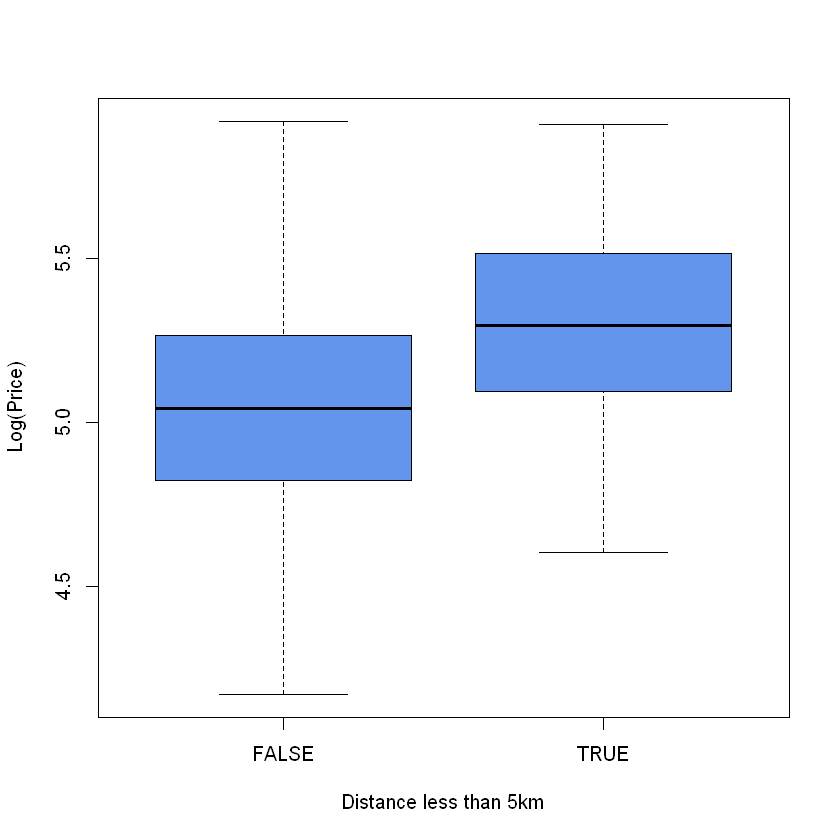

In [23]:
par(mfrow=c(1,1))
boxplot(log(london_data$realSum)~london_data$shorterDist, col = "cornflowerblue", xlab = "Distance less than 5km", ylab = "Log(Price)" )

Test variances

In [22]:
var.test(log(london_data$realSum)~london_data$shorterDist)


	F test to compare two variances

data:  log(london_data$realSum) by london_data$shorterDist
F = 1.1989, num df = 1463, denom df = 1016, p-value = 0.001819
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 1.069929 1.341912
sample estimates:
ratio of variances 
          1.198931 


At the 0.05 significance level, we do have enough evidence to reject H0 as the p-value of 0.001819 < 0.05, hence, the variances are taken to be different

### Test means

In [25]:
t.test(log(london_data$realSum)~london_data$shorterDist, var.equal=FALSE)


	Welch Two Sample t-test

data:  log(london_data$realSum) by london_data$shorterDist
t = -19.874, df = 2303.5, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.2688139 -0.2205289
sample estimates:
mean in group FALSE  mean in group TRUE 
           5.054659            5.299330 


As p-value is extremely small and below 0.05, we can reject H0 that the difference between the means is the same and conclude that the difference between the mean price of Airbnb differs, based on distance of the AirBnb from the city centre.

In [30]:
abs(cor(log(london_data$realSum),london_data$dist))

[1] 0.4265996

In [31]:
cor.test(log(london_data$realSum),london_data$dist)


	Pearson's product-moment correlation

data:  log(london_data$realSum) and london_data$dist
t = -23.484, df = 2479, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.4582590 -0.3938591
sample estimates:
       cor 
-0.4265996 
